# How to address overfitting in neural networks

Most of the keras code are in main_scripts

In [1]:

import main_scripts as ms
from keras.datasets import reuters
import matplotlib.pyplot as plt
from keras import regularizers

# for visualizing neural network
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
# vectorize x and label data
x_train = ms.vectorize_words(train_data, dimension=10000)
x_test = ms.vectorize_words(test_data, dimension=10000)

one_hot_train_labels = ms.vectorize_words(train_labels, dimension=46)
one_hot_test_labels = ms.vectorize_words(test_labels, dimension=46)

# create validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# Build and fit models

In [ ]:
model_orig = ms.nn_architecture(num_act_units=[64, 64], 
                            output_act_units=46, 
                            input_unit_shape=(10000,))

history_orig = model_orig.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

In [ ]:
model_low_cap = ms.nn_architecture(num_act_units=[4, 4], 
                            output_act_units=46, 
                            input_unit_shape=(10000,))
history_low_cap = model_low_cap.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

In [ ]:
model_high_cap = ms.nn_architecture(num_act_units=[640, 640], 
                            output_act_units=46, 
                            input_unit_shape=(10000,))
history_high_cap = model_high_cap.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

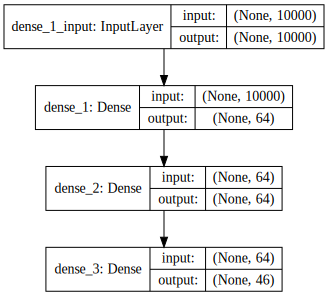

In [6]:
SVG(model_to_dot(model_orig, show_shapes=True).create(prog='dot', format='svg'))

# Accuracy and Loss Curves
Plot the accuracy and loss curves the original model, the simple mode, the complex model for comparison

In [38]:
def loss_curve(history_dict):
    """
    Plot the training and validation loss curves
    of a model
    """
    
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    epochs = range(1, len(history_dict['acc']) + 1)

    plt.plot(epochs, loss_values, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
def compare_val_loss(hist_dict_1, hist_dict_2, model_name_1, model_name_2):
    """
    Compare the loss on the validation set between model_name_1
    and model_name_2
    """
    
    val_loss_values_1 = hist_dict_1['val_loss']
    val_loss_values_2 = hist_dict_2['val_loss']
    epochs = range(1, len(hist_dict_1['val_loss'])+ 1)
    
    plt.plot(epochs, val_loss_values_1, 'bo', color='k', label=model_name_1)
    plt.plot(epochs, val_loss_values_2, 'b', label=model_name_2)
    
    plt.title('{} vs {}'.format(model_name_1, model_name_2))
    plt.xlabel('Epochs')
    plt.ylabel('Validation Loss')
    plt.legend()
    
    plt.show()
    
def compare_val_acc(hist_dict_1, hist_dict_2, model_name_1, model_name_2):
    """
    Compare the accuracy on the validation set between model_name_1
    and model_name_2
    """
    
    val_acc_values_1 = hist_dict_1['val_acc']
    val_acc_values_2 = hist_dict_2['val_acc']
    epochs = range(1, len(hist_dict_1['val_acc'])+ 1)
    
    plt.plot(epochs, val_acc_values_1, 'bo', color='k', label=model_name_1)
    plt.plot(epochs, val_acc_values_2, 'b', label=model_name_2)
    
    plt.title('{} vs {}'.format(model_name_1, model_name_2))
    plt.xlabel('Epochs')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    
    plt.show()
    
def compare_train_loss(hist_dict_1, hist_dict_2, model_name_1, model_name_2):
    """
    Compare the loss on the training set between model_name_1
    and model_name_2
    """
    
    val_train_loss_values_1 = hist_dict_1['loss']
    val_train_loss_values_2 = hist_dict_2['loss']
    epochs = range(1, len(hist_dict_1['loss'])+ 1)
    
    plt.plot(epochs, val_train_loss_values_1, 'bo', color='k', label=model_name_1)
    plt.plot(epochs, val_train_loss_values_2, 'b', label=model_name_2)
    
    plt.title('{} vs {}'.format(model_name_1, model_name_2))
    plt.xlabel('Epochs')
    plt.ylabel('Training Loss')
    plt.legend()
    
    plt.show()

## Validation Loss (Original vs Simple vs Complex Model)

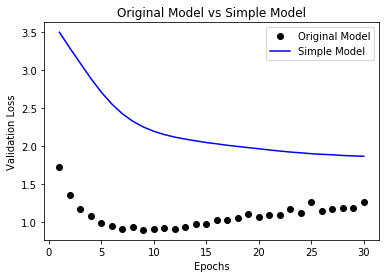

In [8]:
compare_val_loss(history_orig.history, history_low_cap.history, 'Original Model', 'Simple Model')

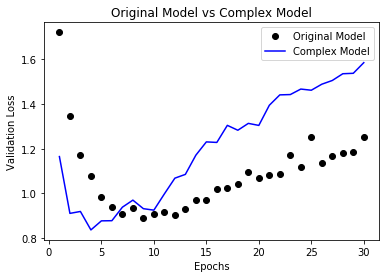

In [9]:
compare_val_loss(history_orig.history, history_high_cap.history, 'Original Model', 'Complex Model')

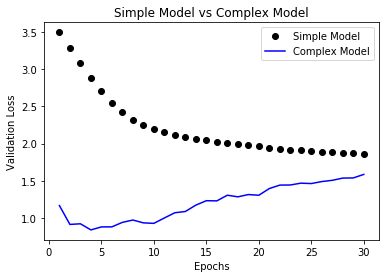

In [10]:
compare_val_loss(history_low_cap.history, history_high_cap.history, 'Simple Model', 'Complex Model')

## Validation Accuracy

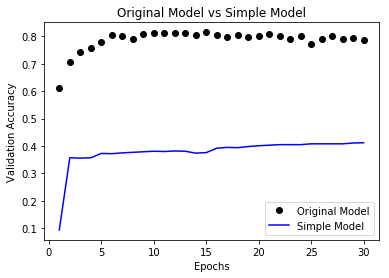

In [11]:
compare_val_acc(history_orig.history, history_low_cap.history, 'Original Model', 'Simple Model')

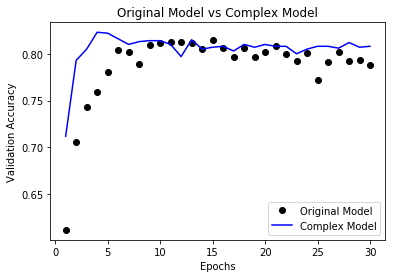

In [12]:
compare_val_acc(history_orig.history, history_high_cap.history, 'Original Model', 'Complex Model')

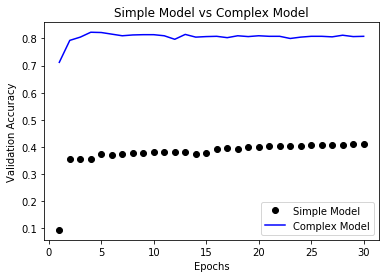

In [13]:
compare_val_acc(history_low_cap.history, history_high_cap.history, 'Simple Model', 'Complex Model')

## Training Loss

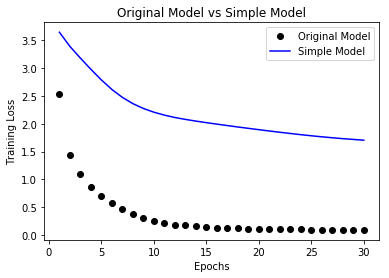

In [14]:
compare_train_loss(history_orig.history, history_low_cap.history, 'Original Model', 'Simple Model')

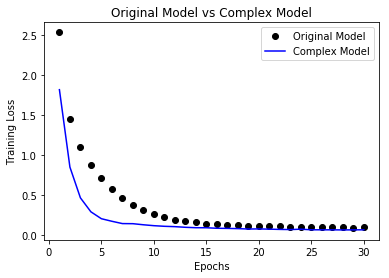

In [15]:
compare_train_loss(history_orig.history, history_high_cap.history, 'Original Model', 'Complex Model')

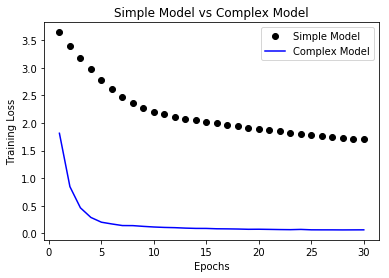

In [16]:
compare_train_loss(history_low_cap.history, history_high_cap.history, 'Simple Model', 'Complex Model')

## Loss curves of orignal, simple, and complex model

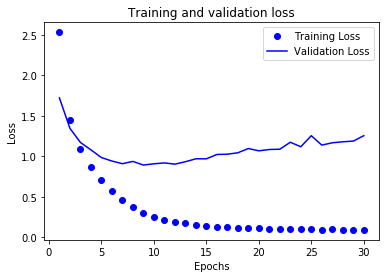

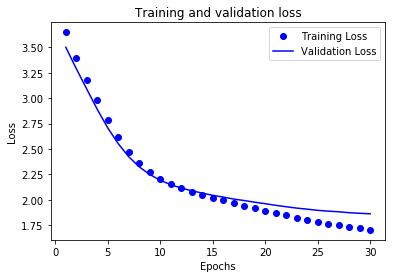

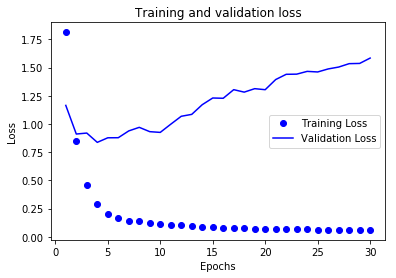

In [17]:
loss_curve(history_orig.history)
loss_curve(history_low_cap.history)
loss_curve(history_high_cap.history)

## L2 Regularization

In [ ]:
# original model
model_orig = ms.nn_architecture(num_act_units=[64, 64], 
                            output_act_units=46, 
                            input_unit_shape=(10000,))

history_orig = model_orig.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

In [40]:
# apply L2 regularization to each layer for various parameter values

reg_param = [1.1, 1., 0.1, 0.01, 0.001, 0.0001]
histories = {}

for p in reg_param:

    print("Regularization parameter value:", p)
    
    model_regularized = ms.nn_architecture(num_act_units=[64, 64], 
                                output_act_units=46, 
                                input_unit_shape=(10000,),
                                regularizer=regularizers.l2(p))

    history_regularized = model_regularized.fit(partial_x_train,
                        partial_y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(x_val, y_val),
                        verbose=1)
    
    histories['hist_{}'.format(p)] = history_regularized
    
    print("")

Regularization parameter value: 1.1
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 223us/step - loss: 38.3691 - acc: 0.4080 - val_loss: 5.7086 - val_acc: 0.4540
Epoch 2/20
7982/7982 [==============================] - 1s 123us/step - loss: 3.5055 - acc: 0.4793 - val_loss: 2.6539 - val_acc: 0.4820
Epoch 3/20
7982/7982 [==============================] - 1s 122us/step - loss: 2.5672 - acc: 0.5016 - val_loss: 2.4739 - val_acc: 0.4780
Epoch 4/20
7982/7982 [==============================] - 1s 126us/step - loss: 2.4684 - acc: 0.5135 - val_loss: 2.4396 - val_acc: 0.5120
Epoch 5/20
7982/7982 [==============================] - 1s 118us/step - loss: 2.4208 - acc: 0.5031 - val_loss: 2.4549 - val_acc: 0.5190
Epoch 6/20
7982/7982 [==============================] - 1s 117us/step - loss: 2.3713 - acc: 0.5179 - val_loss: 2.3994 - val_acc: 0.5290
Epoch 7/20
7982/7982 [==============================] - 1s 117us/step - loss: 2.3269 - acc: 0.5288 

7982/7982 [==============================] - 1s 118us/step - loss: 1.4447 - acc: 0.7224 - val_loss: 1.5035 - val_acc: 0.7030
Epoch 20/20
7982/7982 [==============================] - 1s 118us/step - loss: 1.4270 - acc: 0.7249 - val_loss: 1.4227 - val_acc: 0.7250

Regularization parameter value: 0.01
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 248us/step - loss: 3.0887 - acc: 0.4815 - val_loss: 2.0240 - val_acc: 0.6310
Epoch 2/20
7982/7982 [==============================] - 1s 119us/step - loss: 1.8003 - acc: 0.6715 - val_loss: 1.6314 - val_acc: 0.6900
Epoch 3/20
7982/7982 [==============================] - 1s 121us/step - loss: 1.5239 - acc: 0.7140 - val_loss: 1.4898 - val_acc: 0.7120
Epoch 4/20
7982/7982 [==============================] - 1s 119us/step - loss: 1.3895 - acc: 0.7393 - val_loss: 1.4158 - val_acc: 0.7320
Epoch 5/20
7982/7982 [==============================] - 1s 121us/step - loss: 1.2974 - acc: 0.7657 - val_los

7982/7982 [==============================] - 1s 119us/step - loss: 0.1811 - acc: 0.9574 - val_loss: 0.9507 - val_acc: 0.8140
Epoch 18/20
7982/7982 [==============================] - 1s 118us/step - loss: 0.1779 - acc: 0.9574 - val_loss: 0.9631 - val_acc: 0.8180
Epoch 19/20
7982/7982 [==============================] - 1s 119us/step - loss: 0.1729 - acc: 0.9570 - val_loss: 0.9952 - val_acc: 0.8010
Epoch 20/20
7982/7982 [==============================] - 1s 121us/step - loss: 0.1709 - acc: 0.9569 - val_loss: 0.9761 - val_acc: 0.8090



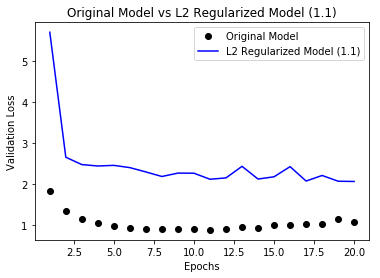

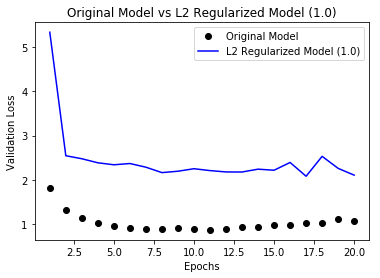

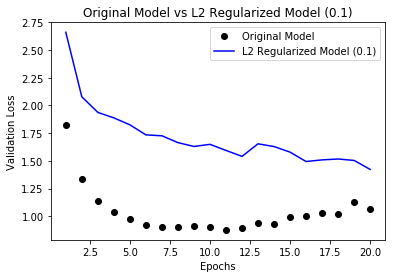

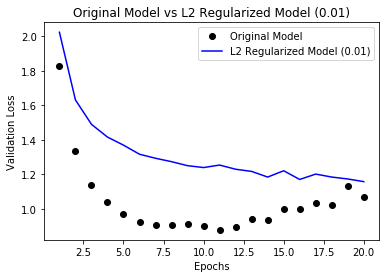

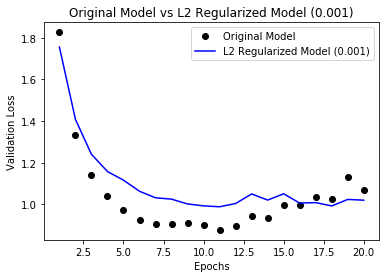

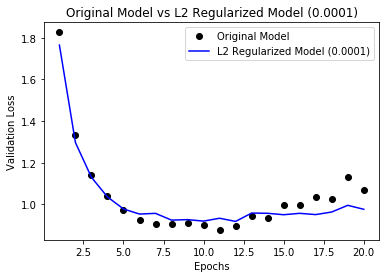

In [41]:
for p in reg_param:

    compare_val_loss(history_orig.history, 
                     histories['hist_{}'.format(p)].history,
                    'Original Model',
                    'L2 Regularized Model ({})'.format(p))